# Import Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
import numpy as np
import pandas as pd
from datetime import datetime
import sklearn

# EDA

In [2]:
df=pd.read_csv('../../data/Complete_Housing_set.csv')
date_format ='%Y%m%d'

# formate the datatype of date for later processing
df['date'] = df['date'].apply(lambda x: datetime.strptime(x.split('T')[0], date_format))

### Null Values

In [3]:
# look at the null values
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

### Range

In [4]:
# look at the range min max of the features
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Correlation

<AxesSubplot:>

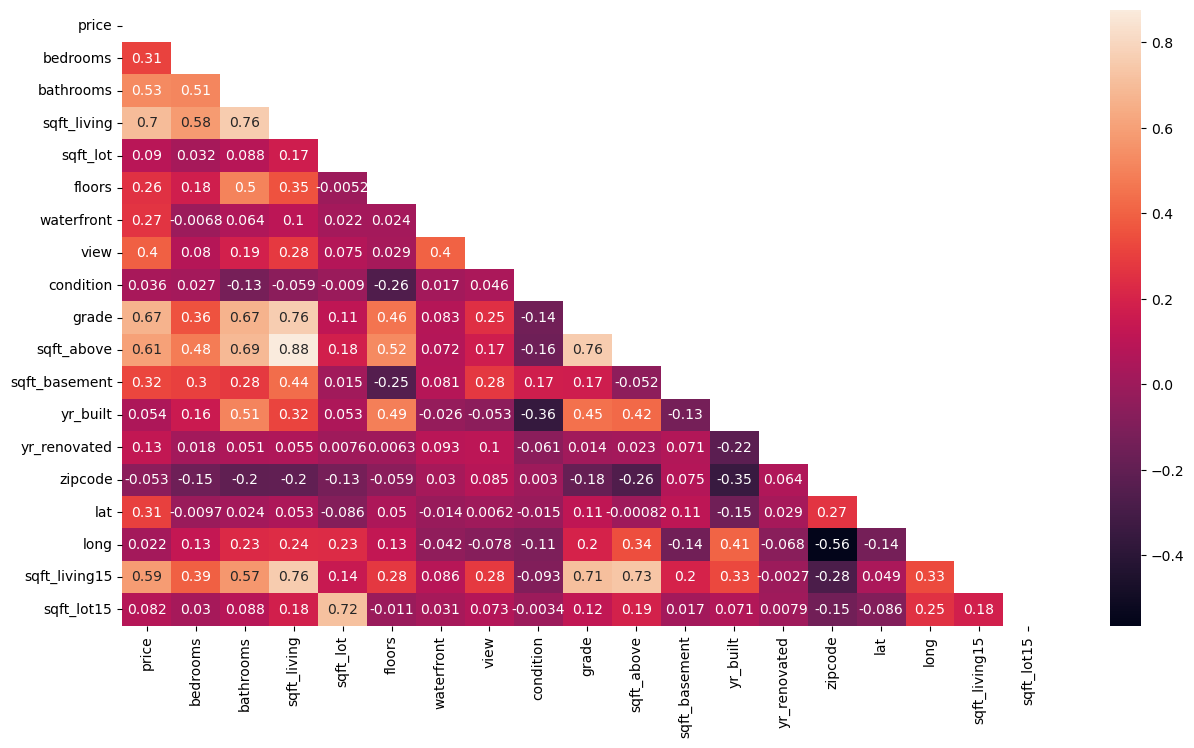

In [5]:
# look at the correlations between the features

df_1 = df.drop(columns=['Unnamed: 0', 'id','date']).corr()

# create the matrix to mask the upper part of the plot
matrix = np.triu(df_1)
plt.figure(figsize=(15,8))
sns.heatmap(df_1, annot = True, mask=matrix)

### Price

<AxesSubplot:xlabel='price', ylabel='Count'>

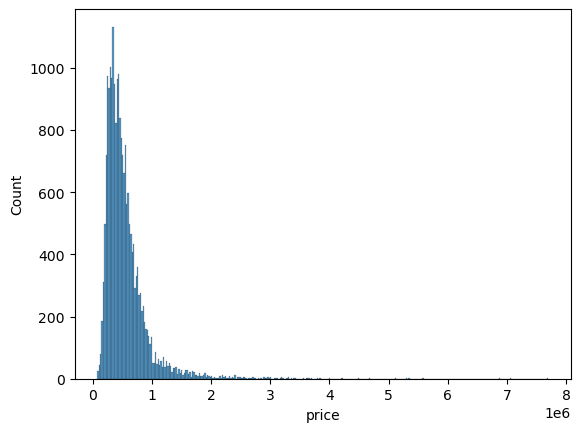

In [6]:
# look at the distribution of price

sns.histplot(data = df,
             x = df['price'])

In [7]:

# calculate the distribution scores for the price variable

Q1 = np.percentile(df.price.sort_values(), 25)
Q3 = np.percentile(df.price.sort_values(), 75)
IQR = np.percentile(df.price.sort_values(), 75) - np.percentile(df.price.sort_values(), 25)
mask = (df['price'] < Q1 - IQR * 1.5) | (df['price'] > Q3 + IQR * 1.5)
                   
len(df.loc[mask].sort_values(by = 'id', ascending = False))

1146

### Features

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

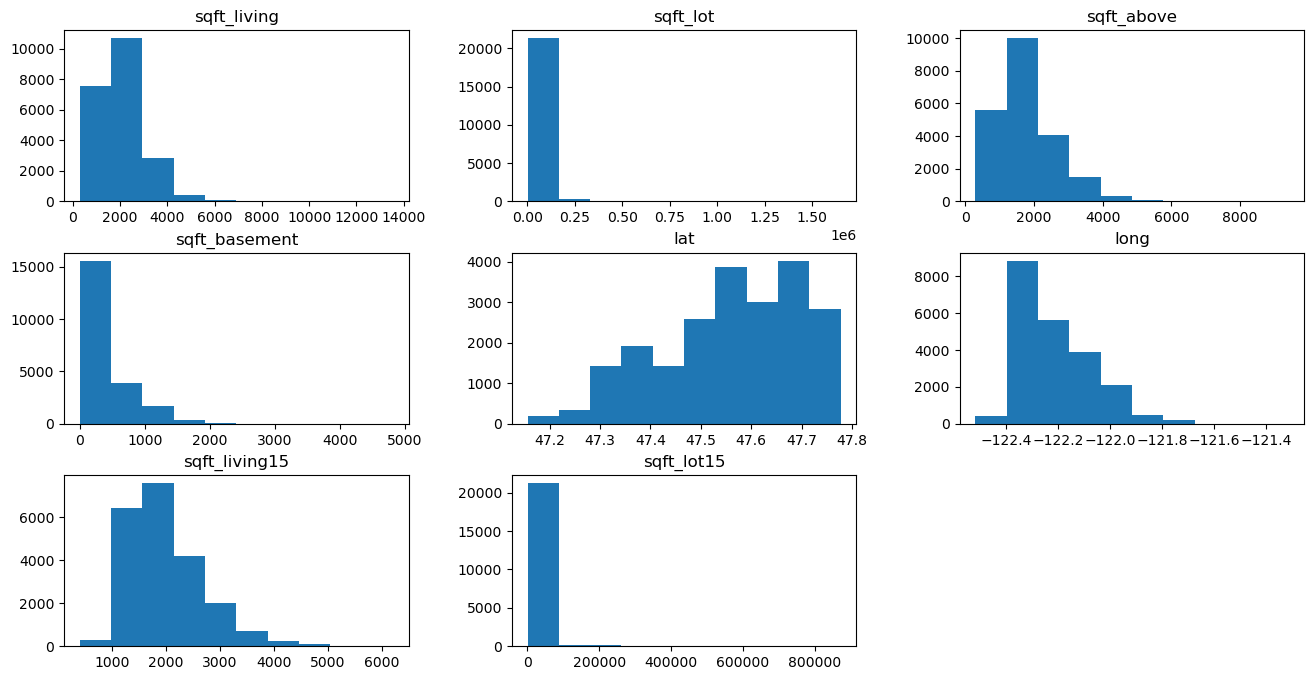

In [8]:
# select the continuous features and plot them out

features_cont = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

df[features_cont].hist(figsize = (16, 8), grid = False)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

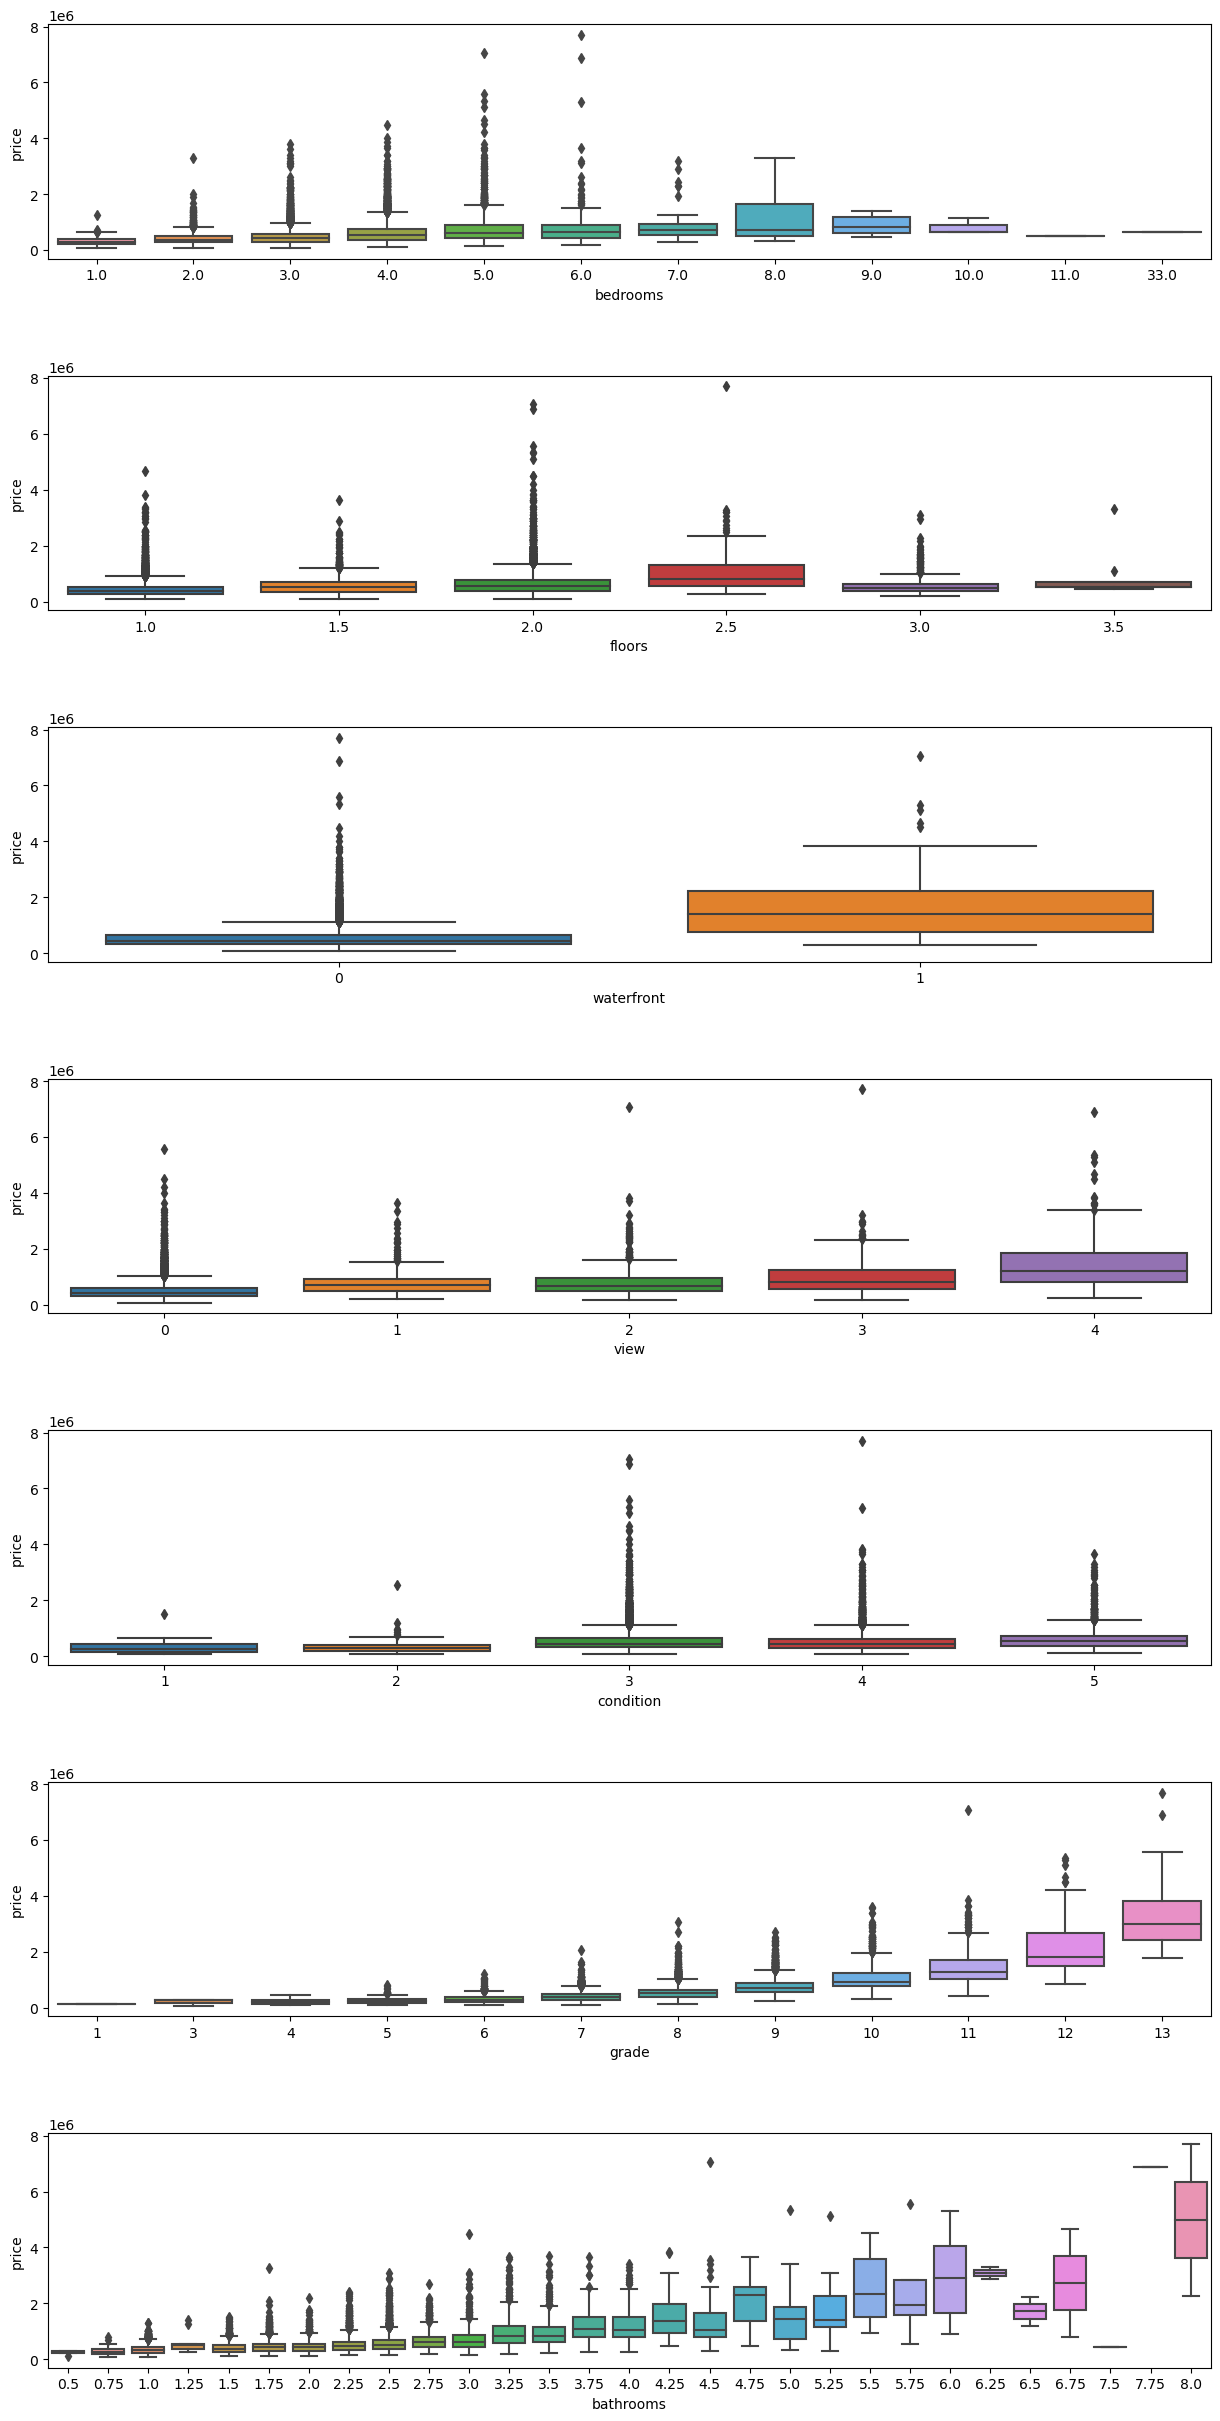

In [9]:
# look at the discrete features using boxplots

fig = plt.figure(figsize = (15, 35))
gs = gridspec.GridSpec(ncols = 1, nrows = 8, hspace = 0.5)

ax1 = fig.add_subplot(gs[0, 0:1])
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=ax1)

ax2 = fig.add_subplot(gs[1,  0:1])
sns.boxplot(x=df['floors'],y=df['price'], ax=ax2)

ax3 = fig.add_subplot(gs[2, 0:1])
sns.boxplot(x=df['waterfront'],y=df['price'], ax=ax3)

ax4 = fig.add_subplot(gs[3,  0:1])
sns.boxplot(x=df['view'],y=df['price'], ax=ax4)

ax5 = fig.add_subplot(gs[4, 0:1])
sns.boxplot(x=df['condition'],y=df['price'], ax=ax5)

ax6 = fig.add_subplot(gs[5,  0:1])
sns.boxplot(x=df['grade'],y=df['price'], ax=ax6)

ax7 = fig.add_subplot(gs[6,  0:1])
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=ax7)

### Location

<AxesSubplot:xlabel='long', ylabel='lat'>

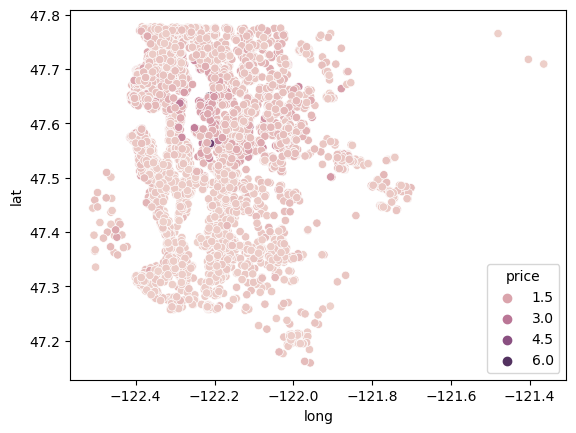

In [10]:
# look at the distribution of data in terms of location, and with hue of price, in order to see the correlation between location and price

sns.scatterplot(data = df.sample(5000),
                x = 'long',
                y = 'lat',
                hue = 'price',
               )

### Sqft_living

In [26]:
df['price'].describe()

count    2.159700e+04
mean     5.402029e+05
std      3.671337e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

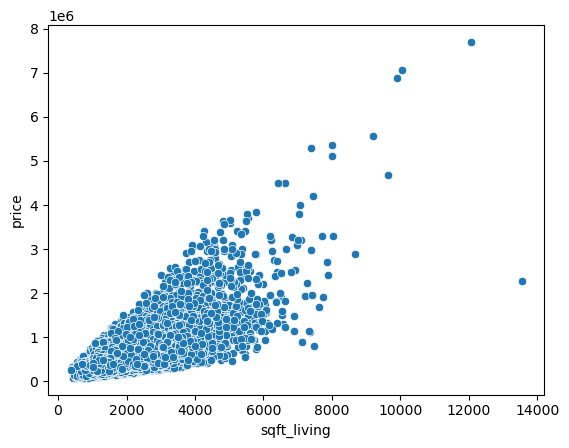

In [27]:
# look at the relationship (estimate of function) between the two features

sns.scatterplot(data = df,
                x = 'sqft_living',
                y = 'price');

# df['sqft_living'] = np.log(df['sqft_living'])

### Years

In [29]:
# separate the data by the date it is put on sale, is it within a year?, also taking into duplicate ids into account

df_2 = df.copy()
df_2 = df_2.sort_values(['id', 'date'], ascending = [True, True])
df_2['resale_within_1y'] = np.where(df_2.groupby('id')['date'].diff() <= pd.Timedelta(days=365), 1, 0)


<AxesSubplot:xlabel='resale_within_1y', ylabel='price'>

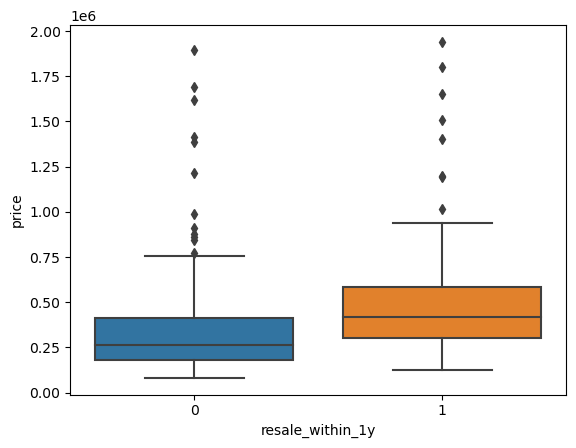

In [30]:
sns.boxplot(data = df_2[df_2['id'].duplicated(keep = False)],
            x = 'resale_within_1y',
            y = 'price')

# Feature Processing

In [31]:
#Custom transformer using a KMeans clusterer in the fit() method to identify the main clusters based on "lat" and "long" features in the training data. 
# It then uses rbf_kernel() in the transform() method to measurehow similar each sample is to each cluster center.
class Location_Cluster(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans()
        self.kmeans_.fit(X, sample_weight=None)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_)

In [32]:
# A function of converting time datatype into a float in order to calculate the distance between time later in the transformer pipline
def dt64_to_float(dt64):
    year = dt64.astype('M8[Y]')
    days = (dt64 - year).astype('timedelta64[D]')
    year_next = year + np.timedelta64(1, 'Y')
    days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')).astype('timedelta64[D]')
    dt_float = 1970 + year.astype(float) + days / (days_of_year)
    return dt_float

In [38]:
num_features = ['id','bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 
                'condition', 'grade', 'sqft_basement', 'sqft_lot15', 'sqft_living', 
                'sqft_above', 'sqft_living15']

# for numerical features, use the standard scaler to first normalize the data
num_pipeline = Pipeline([
    ('standardize', StandardScaler())
])

# create a feature that indicates whether the latest on sale date is within a year
def create_resale_within_1y(X):
    return np.where(X.groupby('id')['date'].diff() <= 365, 1, 0).reshape(-1, 1)

def resale_within_1y_name(function_transformer, feature_names_in):
    return ['resale_within_1y?']


def resale_pipeline():
    return make_pipeline(
        FunctionTransformer(create_resale_within_1y, 'one-to-one'),
        StandardScaler()
        )

cluster_simil = Location_Cluster()

# encode the categorical data 

sqrt_pipeline = make_pipeline(
    FunctionTransformer(np.sqrt,'one-to-one'),
    StandardScaler())


# wrape all of those functions into one custom transformer
custom_transformer = ColumnTransformer([
    ('num_features', num_pipeline, num_features),
    ('resale_within_1y', resale_pipeline(), ['id', 'date']),
    ('geo', cluster_simil, ['lat', 'long']),
    ('categorical', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), ['zipcode']),
    ('sqrt', sqrt_pipeline, ['sqft_living', 'sqft_above', 'sqft_living15'])
]
)

# Split Data

In [ ]:
df.dropna(inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [40]:
# use startified splitting for better performance, ensuring both train and test dataset has approx similar distribution of data

df['sqft_living_cat'] = pd.cut(df['sqft_living'],
                                   bins = [0, 2000, 4000, 6000, np.inf],
                                   labels = [">= 2000", ">= 4000", ">= 6000", "> 6000"])
strat_tr, strat_test = train_test_split(df, 
                                        test_size = 0.2, 
                                        stratify = df['sqft_living_cat'], 
                                        random_state = 42)

In [42]:
# first transform the date feature datatyp, then scale the features using the custom transformer

X_train = strat_tr.drop('price', axis = 1)
X_train['date'] = dt64_to_float(X_train['date'].to_numpy())
X_train_scaled = custom_transformer.fit_transform(X_train)
y_train = strat_tr['price']
y_train_log = np.log(y_train)

X_test = strat_test.drop('price', axis = 1)
X_test['date'] = dt64_to_float(X_test['date'].to_numpy())
X_test_scaled = custom_transformer.transform(X_test)
y_test = strat_test['price']
y_test_log = np.log(y_test)

TypeError: 'str' object is not callable

# Run Linear Regression

In [ ]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train_log)
pred= lr.predict(X_test_scaled)


In [ ]:
mae = mean_absolute_error(pred, y_test_log)
print('Mean absolute error: ', mae)

mse = mean_squared_error(pred, y_test_log)
print('Mean squared error: ', mse)

r2 = r2_score(pred, y_test_log)
print('R2 score is: ', r2)

Mean absolute error:  0.12983793869339283
Mean squared error:  0.030860579609316107
R2 score is:  0.8716927435805937


In [ ]:
ytrain_pred = lr.predict(X_train_scaled)
mae = mean_absolute_error(y_train_log, ytrain_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_train_log, ytrain_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_train_log, ytrain_pred)
print('R2 score is: ', r2)

Mean absolute error:  0.13256492025762423
Mean squared error:  0.032619745191092314
R2 score is:  0.8830046238597586


# Plot Result

In [ ]:
X_train_copy = X_train.copy()
similarities = cluster_simil.fit_transform(X_train_copy[["lat", "long"]])

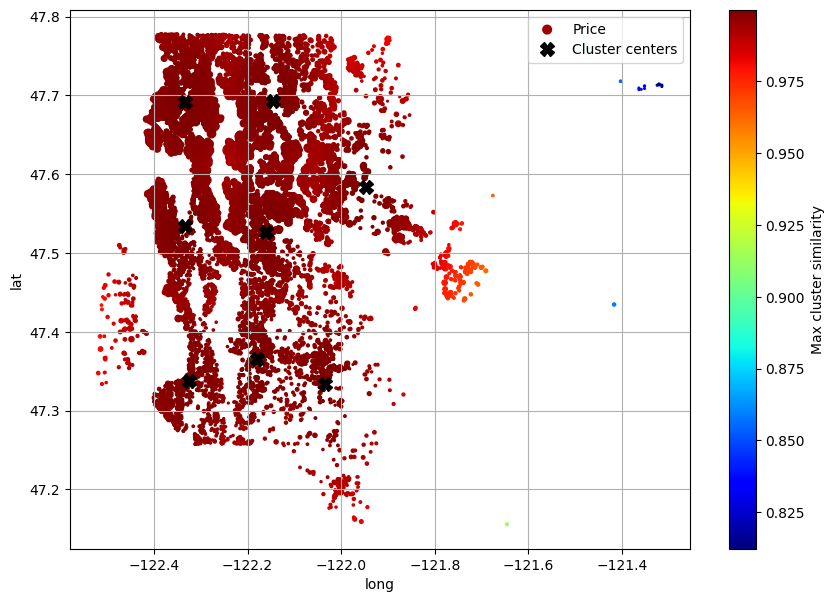

In [ ]:
# plot out how the clustering algorithm worked

X_train_copy["Max cluster similarity"] = similarities.max(axis=1)

X_train_copy.plot(kind="scatter", 
               x="long", 
               y="lat", 
               grid=True,
               s=strat_tr['price']/100000,
               label="Price",
               c="Max cluster similarity",
               cmap="jet", 
               colorbar=True,
               legend=True, 
               sharex=False, 
               figsize=(10, 7))

plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", 
         color="black", 
         marker = "X", 
         markersize=10,
         label="Cluster centers")

plt.legend(loc="upper right")
plt.show()

In [ ]:
metrics = num_features+['resale_within_1y?_0', 'resale_within_1y?','age_built','age_built_binned','age_rnv','age_rnv_binned','age_rnv','age_rnv_binned']
# metrics = num_features
out = pd.DataFrame([lr.coef_[0:len(metrics)]],columns= metrics)

In [ ]:
out.sort_values(by = 0, axis = 1, ascending = False, inplace=True) 

In [ ]:
# look at the coeficient values for the features, here we are only looking at the original features we've used
out

,age_rnv_binned,age_rnv_binned,resale_within_1y?,age_rnv,grade,view,waterfront,condition,sqft_lot,bathrooms,...,resale_within_1y?_0,bedrooms,sqft_above,sqft_basement,floors,sqft_living,sqft_living15,age_rnv,age_built_binned,age_built
0,30.582856,29.801219,6.868745,0.991604,0.100404,0.04736,0.044556,0.035935,0.026375,0.019579,...,-0.006841,-0.010707,-0.023301,-0.027393,-0.031069,-0.034257,-0.053856,-2.160181,-11.412917,-26.202258


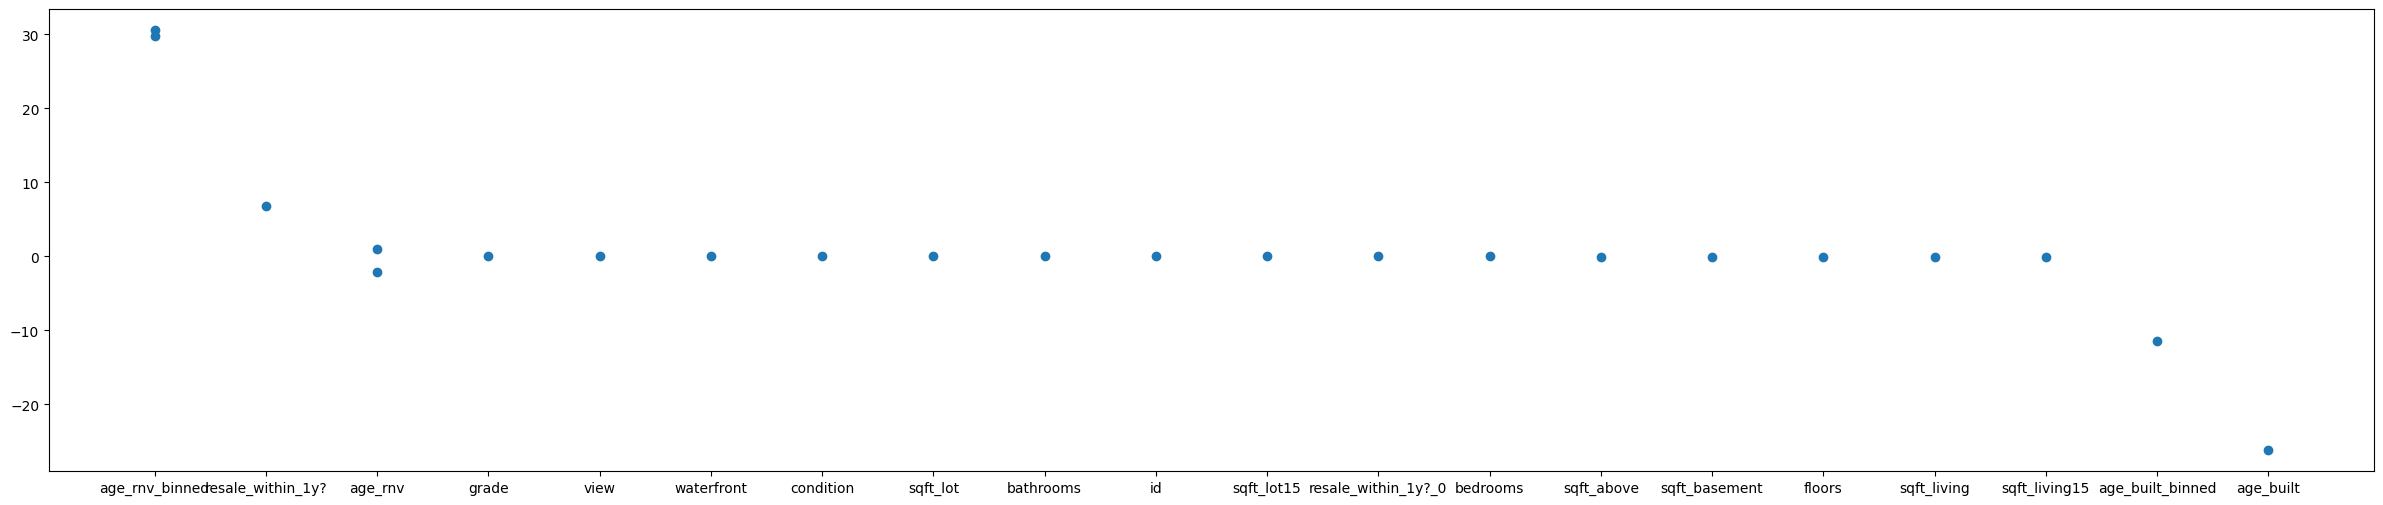

In [ ]:
plt.figure(figsize=(30,6))
plt.scatter(x=list(out.columns),y = out.loc[0])
plt.show()
# out.columns